## Import

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
import pathlib

## Functions

In [2]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [4]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
def view_random_image(target_dir, class_name=""):
  target_folder = target_dir + '/' + class_name
  
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_folder)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

In [6]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

## Download the dataset

In [7]:
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'

zip_dir = tf.keras.utils.get_file(origin=url, extract=True)
zip_dir

'C:\\Users\\bruce\\.keras\\datasets\\10_food_classes_all_data.zip'

```
# File structure
pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
```

In [8]:
base_dir = os.path.join(os.path.dirname(zip_dir), '10_food_classes_all_data')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# train_pizza_dir = os.path.join(train_dir, 'pizza')  # directory with our training pizza pictures
# train_steak_dir = os.path.join(train_dir, 'steak')  # directory with our training steak pictures
# test_pizza_dir = os.path.join(test_dir, 'pizza')  # directory with our test pizza pictures
# test_steak_dir = os.path.join(test_dir, 'steak')  # directory with our test steak pictures

# num_pizza_tr = len(os.listdir(train_pizza_dir))
# num_steak_tr = len(os.listdir(train_steak_dir))

# num_pizza_test = len(os.listdir(test_pizza_dir))
# num_steak_test = len(os.listdir(test_steak_dir))

# total_train = num_pizza_tr + num_steak_tr
# total_test = num_pizza_test + num_steak_test

# print('total training pizza images:', num_pizza_tr)
# print('total training steak images:', num_steak_tr)

# print('total test pizza images:', num_pizza_test)
# print('total test steak images:', num_steak_test)
# print("--")
# print("Total training images:", total_train)
# print("Total test images:", total_test)

# print("--")
data_dir = pathlib.Path(train_dir) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [9]:
walk_through_dir(base_dir)

There are 2 directories and 0 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data'.
There are 10 directories and 0 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in 'C:\Users\bruce\.keras\datasets\10_food_clas

['1551817.jpg']
Image shape: (384, 512, 3)


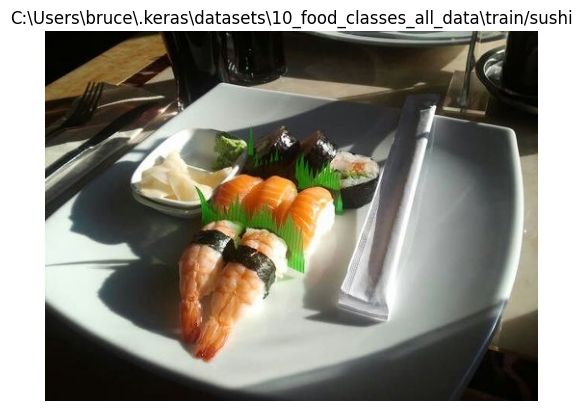

In [10]:
rand_img = view_random_image(target_dir=train_dir, class_name='sushi')

## Set ImageDataGenerator with augmentation

Found 7500 images belonging to 10 classes.


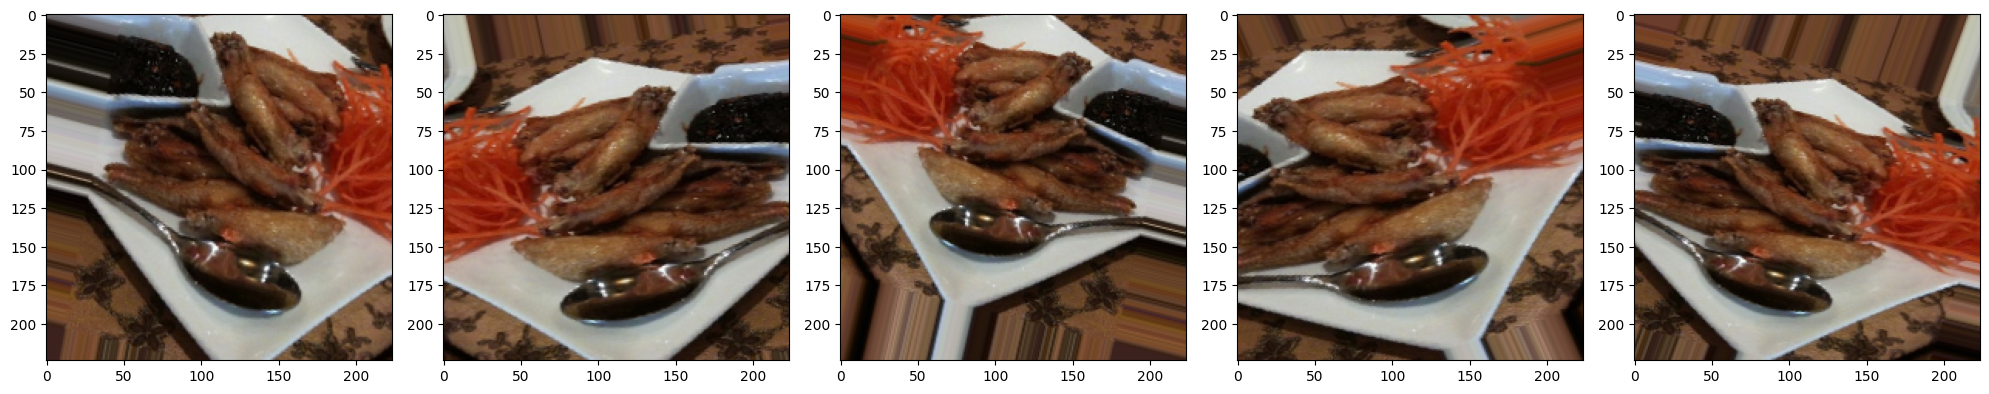

In [20]:
BATCH_SIZE = 32
IMG_SHAPE  = 224

image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_batches = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE)
)

augmented_images = [train_batches[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [21]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_batches = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=test_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE)
)

Found 2500 images belonging to 10 classes.


## Build the model

### Baseline model
Tiny VGG architecture from [CNN explainer](https://poloclub.github.io/cnn-explainer/)

In [15]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=val_batches
)

Epoch 1/10
235/235 [==============================] - 135s 567ms/step - loss: 2.2364 - accuracy: 0.1644 - val_loss: 2.1599 - val_accuracy: 0.2152
Epoch 2/10
235/235 [==============================] - 92s 389ms/step - loss: 2.1513 - accuracy: 0.2147 - val_loss: 2.0462 - val_accuracy: 0.2520
Epoch 3/10
235/235 [==============================] - 95s 406ms/step - loss: 2.0917 - accuracy: 0.2516 - val_loss: 1.9521 - val_accuracy: 0.3144
Epoch 4/10
235/235 [==============================] - 93s 395ms/step - loss: 2.0723 - accuracy: 0.2671 - val_loss: 1.9184 - val_accuracy: 0.3220
Epoch 5/10
235/235 [==============================] - 95s 405ms/step - loss: 2.0162 - accuracy: 0.2951 - val_loss: 1.9102 - val_accuracy: 0.3484
Epoch 6/10
235/235 [==============================] - 96s 409ms/step - loss: 1.9948 - accuracy: 0.3101 - val_loss: 1.8523 - val_accuracy: 0.3696
Epoch 7/10
235/235 [==============================] - 93s 395ms/step - loss: 1.9667 - accuracy: 0.3113 - val_loss: 1.8231 - val_a

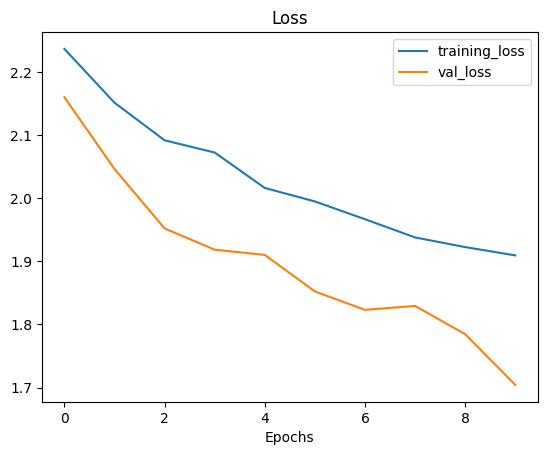

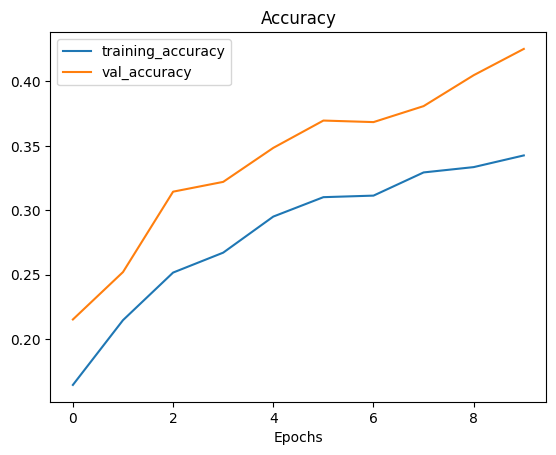

In [16]:
plot_loss_curves(history)